## Analyze Trained Ejik Model

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
out_path = r'C:\git\unity\ejik\drl\eval\6_frames_3_interval_net2'

In [3]:
df_brain = pd.read_csv(os.path.join(out_path, 'brain.csv'))
df_random = pd.read_csv(os.path.join(out_path, 'random.csv'))
df_shooting = pd.read_csv(os.path.join(out_path, 'shooting.csv'))
df = pd.concat({'random': df_random, 'brain':df_brain, 'shooting': df_shooting}, axis=1)

In [4]:
df.head()

brain        random        shooting       
  length reward length reward   length reward
0    167   0.11    126  -0.98      167   0.25
1    167  -0.20    121  -0.91      167   0.38
2    167   0.28    167  -0.16      167   0.10
3    125  -0.94     86  -0.94      167  -0.01
4    167   0.24    167  -0.24      167   0.58

In [5]:
df = df.reset_index()

In [6]:
random_episode = df.loc[:, ('random', 'length')]
brain_episode = df.loc[:, ('brain', 'length')]
shooting_episode = df.loc[:, ('shooting', 'length')]
brain_reward = df.loc[:, ('brain', 'reward')]
random_reward = df.loc[:, ('random', 'reward')]
shooting_reward = df.loc[:, ('shooting', 'reward')]

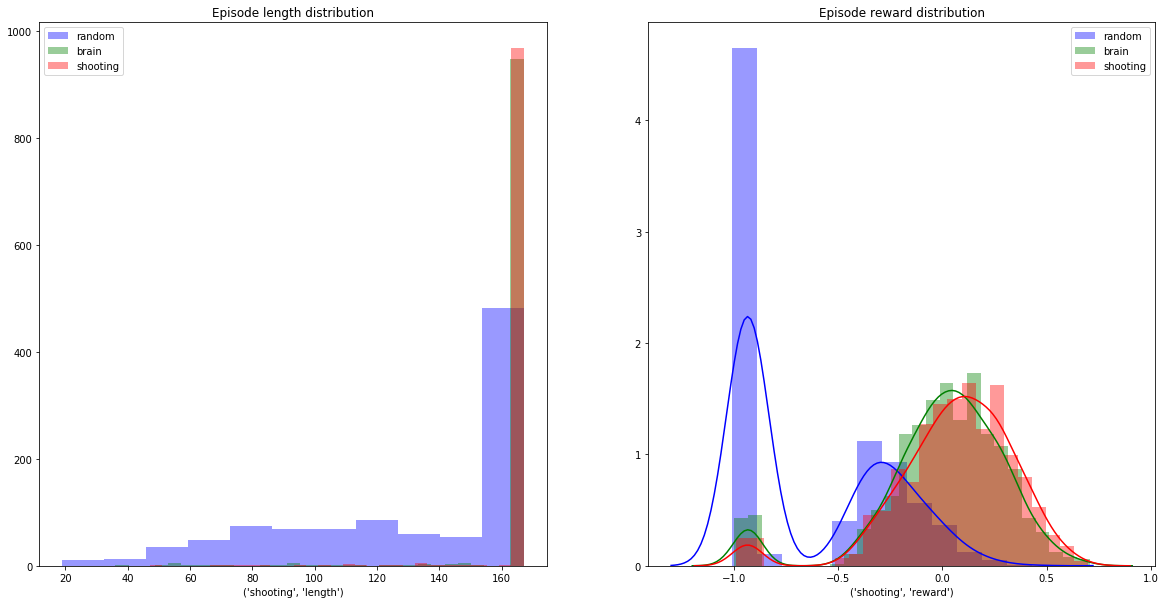

In [7]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(random_episode, hist=True, kde=False, color="b", ax=axes[0], label="random")
sns.distplot(brain_episode, hist=True,kde=False, color="g", ax=axes[0], label="brain")
sns.distplot(shooting_episode, hist=True,kde=False, color="r", ax=axes[0], label="shooting")
sns.distplot(random_reward, hist=True, color="b", ax=axes[1], label="random")
sns.distplot(brain_reward, hist=True, color="g", ax=axes[1], label="brain")
sns.distplot(shooting_reward, hist=True, color="r", ax=axes[1], label="shooting")
axes[1].set_title("Episode reward distribution")
axes[0].set_title("Episode length distribution")
axes[1].legend()
axes[0].legend()

In [8]:
print(f"Mean trained reward: {brain_reward.mean():.4f}, std: {brain_reward.std():.3f}, episode length: {brain_episode.mean():.3f}")
print(f"Mean shooting reward: {shooting_reward.mean():.4f}, std: {shooting_reward.std():.3f}, episode length: {shooting_episode.mean():.3f}")
print(f"Mean random reward: {random_reward.mean():.4f}, std: {random_reward.std():.3f}, episode length: {random_episode.mean():.3f}")


Mean trained reward: -0.0002, std: 0.316, episode length: 163.675
Mean shooting reward: 0.0592, std: 0.294, episode length: 165.329
Mean random reward: -0.6317, std: 0.367, episode length: 131.582
